project presentation link:https://drive.google.com/file/d/1t3DN_N5fjHh9dQJxZqFOnukgUbqvKVVs/view?usp=sharing

#Data **IMPORTING**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# allow plots to appear directly in the notebook
%matplotlib inline
data= pd.read_excel('/content/gender_classification_v7.xlsx')

In [ ]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
data.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

We can see that our data is clean from Nulls, Later we will also replace the "gender" column to numeric data, Then we can work with numeric data only.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
data.shape

(5001, 8)

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())

[1 0]
[11.8 14.  14.4 13.5 13.  15.3 11.9 12.1 12.5 15.5 14.7 14.5 14.2 15.2
 14.6 12.8 12.9 12.2 12.3 12.7 14.1 11.5 13.8 13.7 12.  11.4 15.4 13.3
 13.2 14.3 13.9 11.7 15.1 15.  12.4 11.6 12.6 14.8 13.1 13.4 13.6 14.9]
[6.1 5.4 6.3 5.9 6.8 6.2 5.2 5.8 6.7 6.5 6.  5.6 7.  6.4 5.3 5.7 5.1 5.5
 7.1 6.6 6.9]
[1 0]
[0 1]
[1 0]
[1 0]
['Male' 'Female']


In [ ]:
for i in range(data.shape[1]):  
     print(data.iloc[:,i].value_counts())

1    4349
0     652
Name: long_hair, dtype: int64
12.0    168
11.8    161
14.1    155
14.0    154
11.5    154
11.6    152
11.9    150
13.3    149
14.2    149
12.2    145
12.6    145
12.1    145
13.2    143
14.3    143
12.9    141
12.5    141
13.7    140
12.8    138
12.3    138
13.6    138
13.0    137
13.4    137
13.5    136
13.8    134
11.7    133
13.1    131
13.9    131
12.7    130
12.4    127
11.4     84
14.9     79
14.5     72
15.2     71
15.5     66
15.1     65
15.4     64
15.3     64
14.4     63
14.6     61
15.0     60
14.7     59
14.8     48
Name: forehead_width_cm, dtype: int64
5.7    306
5.9    303
5.3    301
5.5    299
6.1    296
5.1    293
6.2    290
5.8    290
6.4    287
6.3    285
6.5    285
5.6    279
6.0    275
5.4    265
5.2    259
6.6    126
6.8    118
7.0    117
7.1    113
6.9    109
6.7    105
Name: forehead_height_cm, dtype: int64
0    2531
1    2470
Name: nose_wide, dtype: int64
1    2540
0    2461
Name: nose_long, dtype: int64
0    2535
1    2466
Name: lips_thin, d

#***EDA***

Gender on 

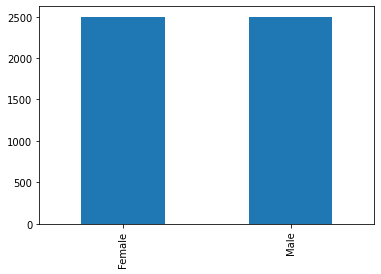

In [ ]:
data['gender'].value_counts().plot(kind='bar')

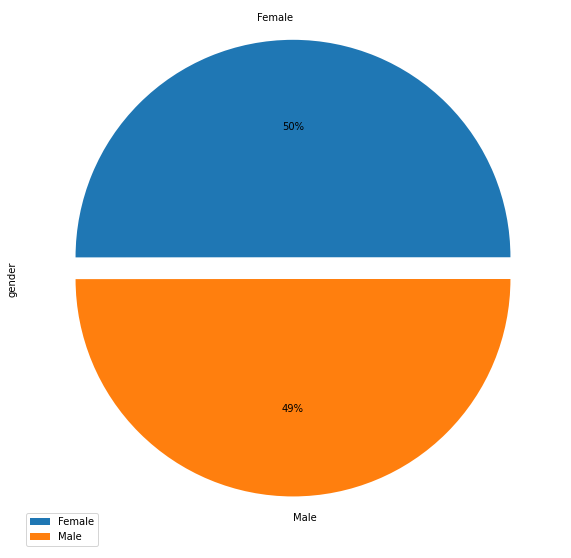

In [ ]:
plt.figure(figsize=(10,10))
explode=[0.1,0]
data['gender'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.show()

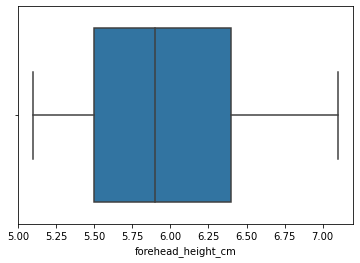

In [ ]:
sns.boxplot(x=data["forehead_height_cm"])

 Relation between  forehead_width_cm and forehead_height_cm with respect to Gender

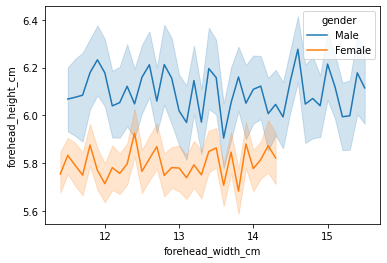

In [ ]:
sns.lineplot(data['forehead_width_cm'],data['forehead_height_cm'], hue=data["gender"])

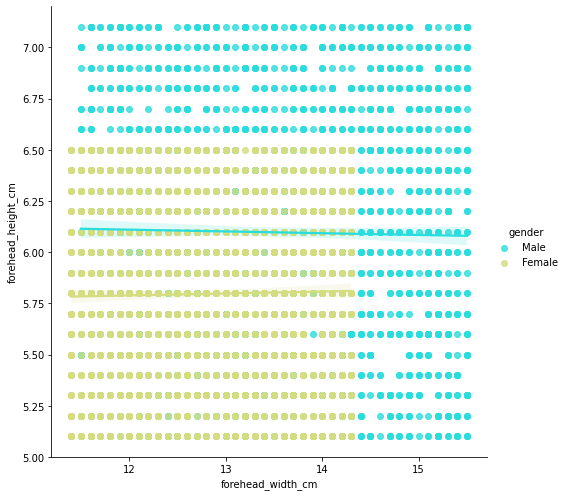

In [ ]:
sns.lmplot(x="forehead_width_cm", y="forehead_height_cm", hue="gender", data=data, palette = 'rainbow', height = 7)



This graph describe the longer and wider the forehead, the more likely it is a man

Relation between Nose_long and Nose_wide with respect to Gender

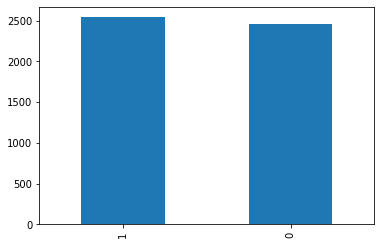

In [ ]:
data['nose_long'].value_counts().plot(kind='bar')

Here also the division is really equal - men have longer and wider nose then women.

Relation between Lips thin and Distance _nose_to _liplong with respect to gender

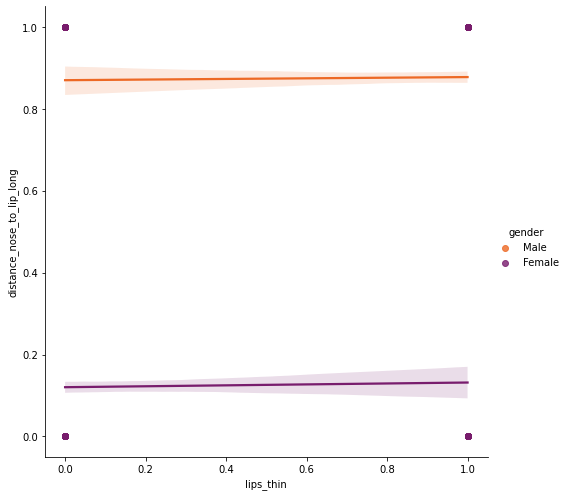

In [ ]:
sns.lmplot(x="lips_thin", y="distance_nose_to_lip_long", hue="gender", data=data, palette = 'inferno_r', height = 7)



We can conclude from the graph above that the division is really equal - men have thinner lips and a greater distance from the lip to the chin.

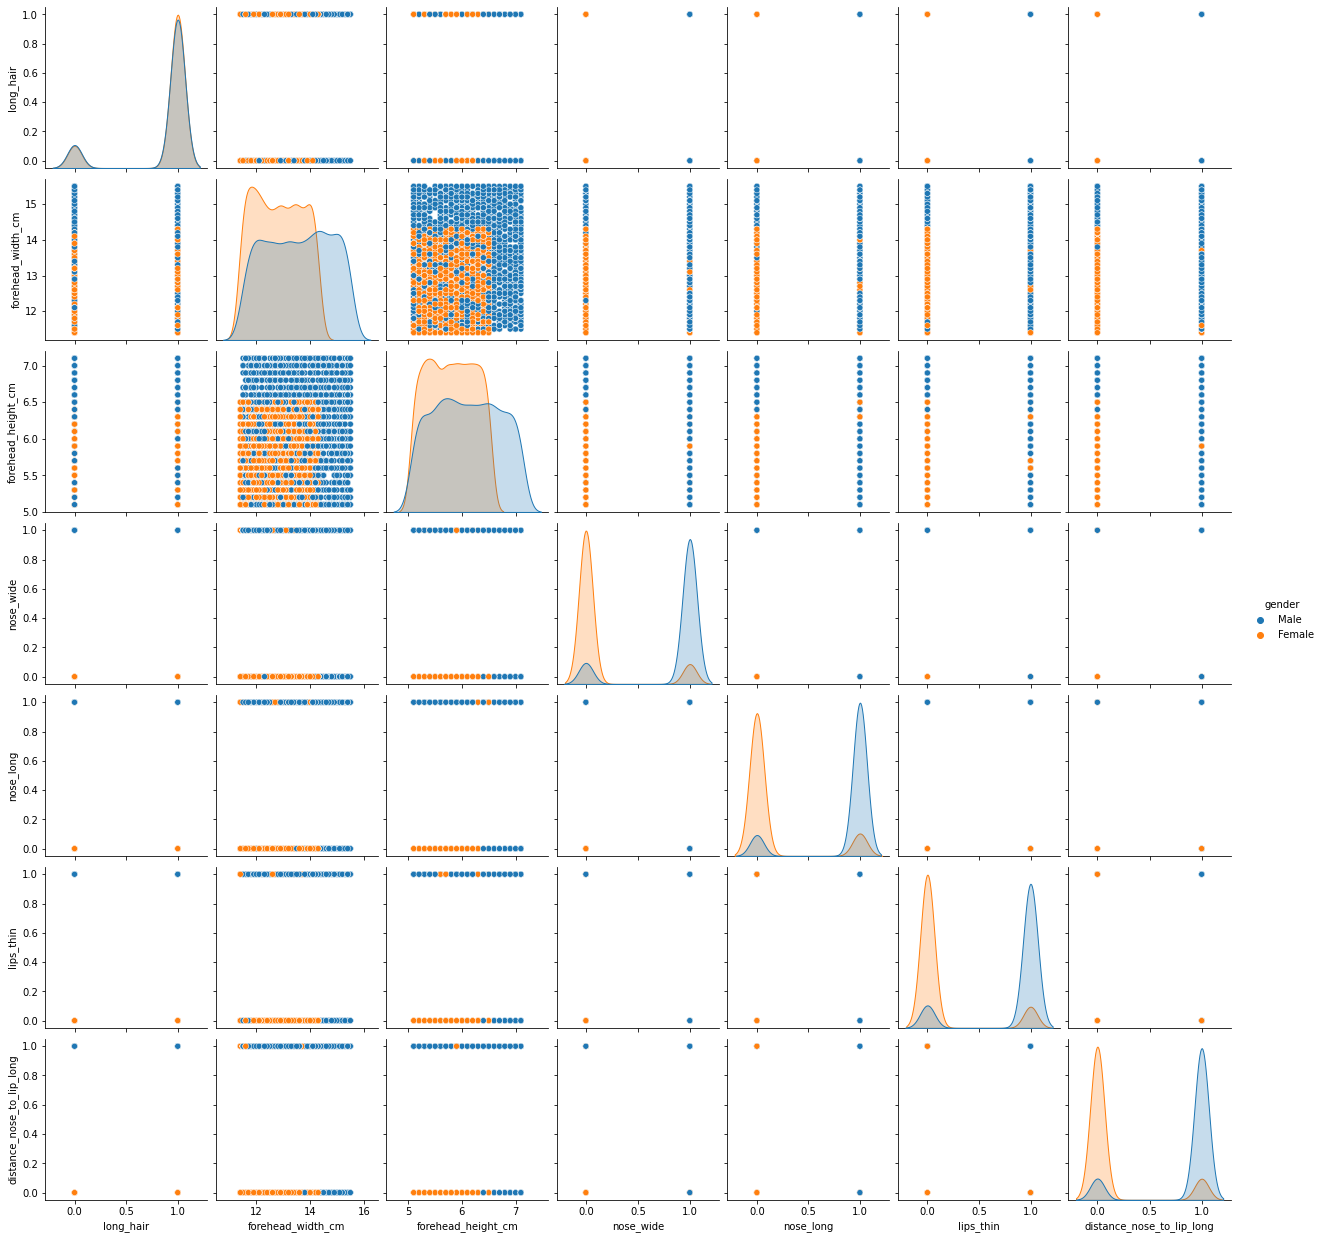

In [ ]:
sns.pairplot(data,hue='gender')

Correlation plot 


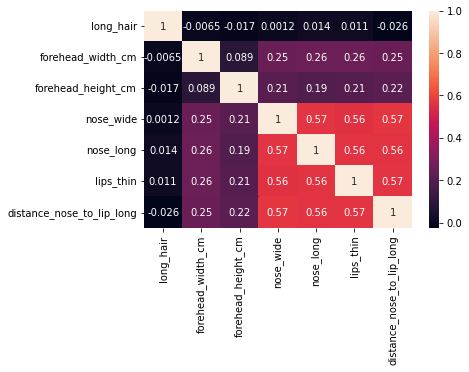

In [ ]:
sns.heatmap(data.corr(),annot=True)

We can also visualize the correlation with our target variable in a sorted and clearer way.

#Tranforming categorical to Binary form

In [ ]:
twogender = {'Female':0, 'Male':1}
data['gender'] = data['gender'].map(twogender)

In [ ]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


#model fitting


In [ ]:
X = data.drop('gender', axis=1)
y = data['gender']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 7)
(1001, 7)
(4000,)
(1001,)


In [ ]:
from sklearn.linear_model import LogisticRegression
lgt = LogisticRegression(C=1e9)
lgt_model = lgt.fit(X_train,y_train)

In [ ]:
lgt_pred = lgt.predict(X_test)
lgt_acc = accuracy_score(y_test,lgt_pred)

In [ ]:
print("Accuracy of Logistic Regression: {:.2f}%".format(lgt_acc*100))

Accuracy of Logistic Regression: 96.70%


In [ ]:
def get_test_result(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test,test_pred))

In [ ]:
test_result=get_test_result(lgt_model)
print(test_result)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       501
           1       0.97      0.96      0.97       500

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



#NN

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model.fit(X_train, y_train, epochs= 500,verbose=0)

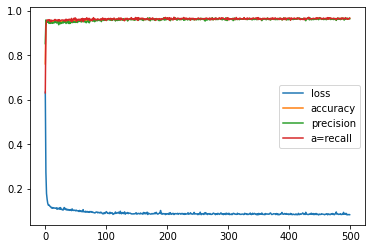

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 993us/step - loss: 0.0625 - accuracy: 0.9753 - precision: 0.9710 - a=recall: 0.9800


[0.06254967302083969,
 0.9753497838973999,
 0.9709762334823608,
 0.9800266027450562]

In [ ]:
tf.random.set_seed(55)
model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model1.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model1.fit(X_train, y_train, epochs= 400,verbose=0)

KeyboardInterrupt: ignored

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model1.evaluate(X_test, y_test)

In [ ]:
tf.random.set_seed(65)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model.fit(X_train, y_train, epochs= 800,verbose=0)

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
tf.random.set_seed(65)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model.fit(X_train, y_train, epochs= 800,verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
tf.random.set_seed(55)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(2, activation='sigmoid'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model.fit(X_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
tf.random.set_seed(55)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(2, activation='sigmoid'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model.fit(X_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
tf.random.set_seed(45)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='sigmoid'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model.fit(X_train, y_train, epochs= 200,verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
tf.random.set_seed(55)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='sigmoid'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model.fit(X_train, y_train, epochs= 200,verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=55)

tf.random.set_seed(65)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(4, activation='sigmoid'),
                            tf.keras.layers.Dense(2, activation='sigmoid'),
                            tf.keras.layers.Dense(1, activation='sigmoid')

])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model.fit(X_train, y_train, epochs= 500,verbose=0)

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
tf.random.set_seed(65)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(4, activation='sigmoid'),
                            tf.keras.layers.Dense(2, activation='sigmoid'),
                            tf.keras.layers.Dense(1, activation='sigmoid')

])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model.fit(X_train, y_train, epochs= 500,verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=55)

tf.random.set_seed(65)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')

])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model.fit(X_train, y_train, epochs= 500,verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
tf.random.set_seed(45)
model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model1.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model1.fit(X_train, y_train, epochs= 500,verbose=0)

In [ ]:
model1.evaluate(X_test, y_test)

In [ ]:
tf.random.set_seed(45)
model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model1.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model1.fit(X_train, y_train, epochs= 50,verbose=0)

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model1.evaluate(X_test, y_test)

In [ ]:
tf.random.set_seed(45)
model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model1.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

In [ ]:
history= model1.fit(X_train, y_train, epochs= 800,verbose=0)

In [ ]:
model1.evaluate(X_test, y_test)

#**KNN**

Instantiating the KNN Algorithm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

Trainning the KNN algorithm

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Knn_pred = knn.predict(X_test)
KNN_acc = accuracy_score(y_test,Knn_pred)

In [ ]:
print(KNN_acc)

0.9690309690309691


Predicting with the Test Data and the KNN Algorithm

In [ ]:
results = knn.predict(X_test)
results

array([0, 1, 1, ..., 0, 1, 1])

**VALIDATION**

Cross Tabulation

In [ ]:
print(pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

Predicted    0    1  total
Real                      
0          498   16    514
1           15  472    487
total      513  488   1001



**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(knn, data.drop('gender',axis=1), data.gender, cv=5, scoring='accuracy')
scores

array([0.95804196, 0.962     , 0.969     , 0.97      , 0.973     ])

In [ ]:
var_acc ="%", print("Accuracy for Cross Validation: %0.1f" % (scores.mean()*100),"(+/- %0.1f)" % (scores.std() * 100))

Accuracy for Cross Validation: 96.6 (+/- 0.6)


**Optimizing the Parameter K (n_neighbors)**

In [ ]:
k_list = list(range(1,50))

In [ ]:
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])


Instantiating the GridSearch Object

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

Training the GridSearch Object

In [ ]:
grid.fit(data.drop('gender', axis=1), data.gender)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

Checking for the Scores

In [ ]:
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004932,0.000856,0.022177,0.000338,1,{'n_neighbors': 1},0.952048,0.956,0.968,0.961,0.966,0.960610,0.005973,49
1,0.004408,0.000047,0.024611,0.001912,2,{'n_neighbors': 2},0.950050,0.962,0.970,0.961,0.962,0.961010,0.006370,48
2,0.004373,0.000058,0.023699,0.000483,3,{'n_neighbors': 3},0.958042,0.962,0.969,0.970,0.973,0.966408,0.005523,44
3,0.004386,0.000110,0.026297,0.004451,4,{'n_neighbors': 4},0.956044,0.961,0.974,0.965,0.973,0.965809,0.006898,46
4,0.004538,0.000074,0.026427,0.002478,5,{'n_neighbors': 5},0.956044,0.958,0.976,0.963,0.974,0.965409,0.008178,47


In [ ]:
for key in grid.cv_results_.keys():
  print(key) 

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [ ]:
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
47,{'n_neighbors': 48},0.974207,0.007103,1


In [ ]:
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

The best value of k = {'n_neighbors': 48} with 0.9742067932067933 of accuracy.


In [ ]:
print("The best classifier is: {}".format(grid.best_estimator_))

The best classifier is: KNeighborsClassifier(n_neighbors=48)


Graphically, the list of results of the k number of neighbors versus the accuracy

In [ ]:
import matplotlib.pyplot as plt

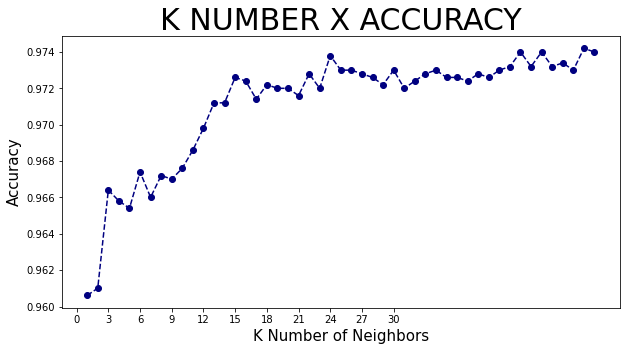

In [ ]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

#SVM

In [ ]:

from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()
X_train_std = scale.fit_transform(X_train)
X_test_std = scale.transform(X_test)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
#fit the model
knn.fit(X_train_std, y_train)
#predict the model
knn_pred = knn.predict(X_test_std)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn import metrics
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
print("\n", "Classification Report::")
print(metrics.classification_report(y_test,knn_pred), '\n')


Model Validation ==>

Accuracy Score of KNN Model::
0.971028971028971

 Classification Report::
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       514
           1       0.97      0.97      0.97       487

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001
 



SVM Model Fitting with kernel Radial basis function

In [ ]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf', random_state= 0, probability=True)
classifier_rbf.fit(X_train_std, y_train)
#predicting
svc_pred_rbf = classifier_rbf.predict(X_test_std)

In [ ]:
from sklearn import metrics
print("Model Validation ==>\n")
print("RBF Kernel Accuracy of SVC Classifier::")
SVM_Rad=metrics.accuracy_score(y_test,svc_pred_rbf)
print(SVM_Rad)
print("\n", "Classification Report::")
print(metrics.classification_report(y_test,svc_pred_rbf), '\n')



Model Validation ==>

RBF Kernel Accuracy of SVC Classifier::
0.972027972027972

 Classification Report::
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       514
           1       0.97      0.98      0.97       487

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001
 



Model fitting with Linear function

In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[0 1 1 ... 0 1 1]


In [ ]:

SVC_LIN = accuracy_score(y_test,predictions)
print(SVC_LIN)

0.968031968031968


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {SVC_LIN*100} %")

Confusion Matrix
[[490  24]
 [  8 479]]
Test Set: 1001
Accuracy = 96.8031968031968 %


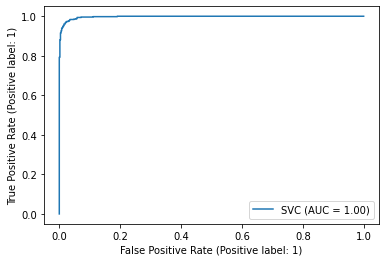

In [ ]:
metrics.plot_roc_curve(model ,X_test , y_test)

#**Bagging**

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
from pandas.core.describe import describe_timestamp_as_categorical_1d
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)
dct_acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(dct_acc))

NameError: ignored

decision tree with respect to ginni index

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
DT_ginni=accuracy_score(y_test, y_pred_gini)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9590


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9645


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9645
Test set score: 0.9590


[Text(0.5, 0.875, 'X[3] <= 0.5\ngini = 0.5\nsamples = 4000\nvalue = [1987, 2013]'),
 Text(0.25, 0.625, 'X[5] <= 0.5\ngini = 0.217\nsamples = 2009\nvalue = [1760, 249]'),
 Text(0.125, 0.375, 'X[2] <= 6.55\ngini = 0.042\nsamples = 1582\nvalue = [1548, 34]'),
 Text(0.0625, 0.125, 'gini = 0.029\nsamples = 1571\nvalue = [1548, 23]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.375, 0.375, 'X[6] <= 0.5\ngini = 0.5\nsamples = 427\nvalue = [212, 215]'),
 Text(0.3125, 0.125, 'gini = 0.215\nsamples = 212\nvalue = [186, 26]'),
 Text(0.4375, 0.125, 'gini = 0.213\nsamples = 215\nvalue = [26, 189]'),
 Text(0.75, 0.625, 'X[4] <= 0.5\ngini = 0.202\nsamples = 1991\nvalue = [227, 1764]'),
 Text(0.625, 0.375, 'X[6] <= 0.5\ngini = 0.5\nsamples = 400\nvalue = [206, 194]'),
 Text(0.5625, 0.125, 'gini = 0.21\nsamples = 210\nvalue = [185, 25]'),
 Text(0.6875, 0.125, 'gini = 0.197\nsamples = 190\nvalue = [21, 169]'),
 Text(0.875, 0.375, 'X[6] <= 0.5\ngini = 0.026\nsamples = 1591\

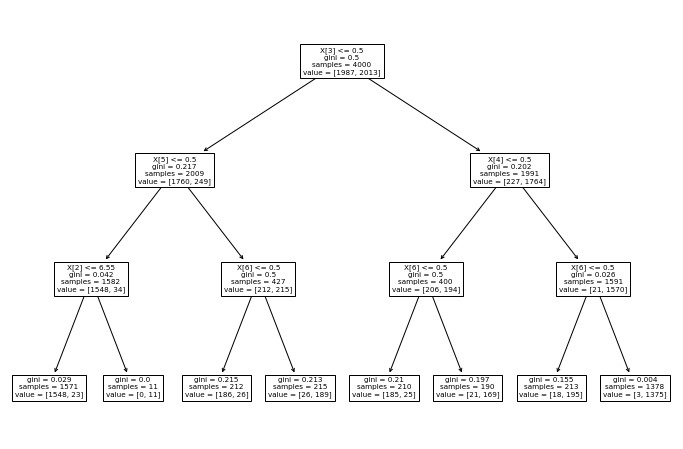

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       514
           1       0.95      0.97      0.96       487

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)
RAD_pred = model.predict(X_test)
Rad_acc = accuracy_score(y_test,RAD_pred)

print(Rad_acc)

0.971028971028971


In [ ]:
y_predicted=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion=confusion_matrix(y_test,y_predicted)

In [ ]:
confusion

array([[495,  19],
       [ 10, 477]])

Text(33.0, 0.5, 'truth')

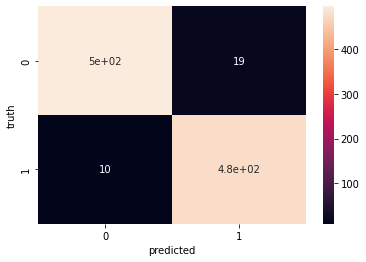

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(confusion,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

#**ADABOOST**

Adaboost wrt decision tree estimator

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=0)
adaboost = AdaBoostClassifier(base_estimator=base_estimator,
                              n_estimators=3, algorithm="SAMME",
                              random_state=0)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
print(f"Weight of each classifier: {adaboost.estimator_weights_}")

Weight of each classifier: [3.30940347 1.74739117 1.29543778]


In [ ]:
print(f"Error of each classifier: {adaboost.estimator_errors_}")

Error of each classifier: [0.03525    0.14837655 0.21493383]


In [ ]:
y_predict=adaboost.predict(X_test)
ADa_acc=metrics.accuracy_score(y_test,y_predict)
print(ADa_acc)

0.9600399600399601


In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
ADA_DcT=metrics.accuracy_score(y_test, y_pred)
print(ADA_DcT)

0.975024975024975


ADAboost wrt SVM base estimator

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='rbf')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
ADA_SVM=metrics.accuracy_score(y_test, y_pred)
print(ADA_SVM)


0.9590409590409591


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
y_predict = gbcl.predict(X_test)
GBC_acc=accuracy_score(y_test, y_predict)
print(GBC_acc)
print(metrics.confusion_matrix(y_test, y_predict))

0.9760239760239761
[[487   3]
 [ 21 490]]


#XGBoosting

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier()

In [ ]:
predictions1 = xgb_classifier.predict(X_test)

In [ ]:
predictions1

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
XGB_acc=accuracy_score(y_test,predictions1)

In [ ]:
print(XGB_acc)

0.9760239760239761


#other ratios


#KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Knn_pred = knn.predict(X_test)
KNN_acc = accuracy_score(y_test,Knn_pred)

In [ ]:
print(KNN_acc)

0.9633577614923384


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Knn_pred = knn.predict(X_test)
KNN_acc = accuracy_score(y_test,Knn_pred)

In [ ]:
print(KNN_acc)

0.968015992003998


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#SVM

In [ ]:
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()
X_train_std = scale.fit_transform(X_train)
X_test_std = scale.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf', random_state= 0, probability=True)
classifier_rbf.fit(X_train_std, y_train)
#predicting
svc_pred_rbf = classifier_rbf.predict(X_test_std)

In [ ]:
from sklearn import metrics
print("Model Validation ==>\n")
print("RBF Kernel Accuracy of SVC Classifier::")
SVM_Rad=metrics.accuracy_score(y_test,svc_pred_rbf)
print(SVM_Rad)

Model Validation ==>

RBF Kernel Accuracy of SVC Classifier::
0.9733510992671552


In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
SVC_LIN = accuracy_score(y_test,predictions)
print(SVC_LIN)

0.966688874083944


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()
X_train_std = scale.fit_transform(X_train)
X_test_std = scale.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf', random_state= 0, probability=True)
classifier_rbf.fit(X_train_std, y_train)
#predicting
svc_pred_rbf = classifier_rbf.predict(X_test_std)

In [ ]:
from sklearn import metrics
print("Model Validation ==>\n")
print("RBF Kernel Accuracy of SVC Classifier::")
SVM_Rad=metrics.accuracy_score(y_test,svc_pred_rbf)
print(SVM_Rad)

Model Validation ==>

RBF Kernel Accuracy of SVC Classifier::
0.9700149925037481


In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[1 1 1 ... 0 1 0]


In [ ]:
SVC_LIN = accuracy_score(y_test,predictions)
print(SVC_LIN)

0.967016491754123


#Bagging

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from pandas.core.describe import describe_timestamp_as_categorical_1d
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)
dct_acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(dct_acc))

Test set accuracy: 0.97


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from pandas.core.describe import describe_timestamp_as_categorical_1d
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)
dct_acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(dct_acc))

Test set accuracy: 0.96


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)
RAD_pred = model.predict(X_test)
Rad_acc = accuracy_score(y_test,RAD_pred)
print(Rad_acc)

0.966022651565623


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)
RAD_pred = model.predict(X_test)
Rad_acc = accuracy_score(y_test,RAD_pred)
print(Rad_acc)

0.9685157421289355


#Boosting


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=0)
adaboost = AdaBoostClassifier(base_estimator=base_estimator,
                              n_estimators=3, algorithm="SAMME",
                              random_state=0)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_predict=adaboost.predict(X_test)
ADa_acc=metrics.accuracy_score(y_test,y_predict)
print(ADa_acc)

0.977348434377082


In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
ADA_DcT=metrics.accuracy_score(y_test, y_pred)
print(ADA_DcT)

0.9740173217854764


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='rbf')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
ADA_SVM=metrics.accuracy_score(y_test, y_pred)
print(ADA_SVM)

0.9560293137908061


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=0)
adaboost = AdaBoostClassifier(base_estimator=base_estimator,
                              n_estimators=3, algorithm="SAMME",
                              random_state=0)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_predict=adaboost.predict(X_test)
ADa_acc=metrics.accuracy_score(y_test,y_predict)
print(ADa_acc)

0.9700149925037481


In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
ADA_DcT=metrics.accuracy_score(y_test, y_pred)
print(ADA_DcT)

0.968015992003998


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='rbf')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
ADA_SVM=metrics.accuracy_score(y_test, y_pred)
print(ADA_SVM)

0.6291854072963519


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
y_predict = gbcl.predict(X_test)
GBC_acc=accuracy_score(y_test, y_predict)
print(GBC_acc)

0.9840106595602931


In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier()

In [ ]:
predictions1 = xgb_classifier.predict(X_test)

In [ ]:
XGB_acc=accuracy_score(y_test,predictions1)
print(XGB_acc)

0.9820119920053297


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
y_predict = gbcl.predict(X_test)
GBC_acc=accuracy_score(y_test, y_predict)
print(GBC_acc)

0.9770114942528736


In [ ]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

In [ ]:
xgb_classifier.fit(X_train,y_train)
predictions1 = xgb_classifier.predict(X_test)

In [ ]:
XGB_acc=accuracy_score(y_test,predictions1)
print(XGB_acc)

0.9760119940029985
